In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib as mpl


In [ ]:
keras = tf.keras
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00580/hungary_chickenpox.zip" # dataset url link

In [ ]:
# download and unzip required file
import requests, zipfile, io
r = requests.get(URL)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content/chickenpox")
# read the files
train_df = pd.read_csv('/content/chickenpox/hungary_chickenpox.csv')
test_df = pd.read_csv('/content/chickenpox/hungary_county_edges.csv')

In [ ]:
train_df['TOTAL'] = train_df.iloc[:,1:].sum(axis=1)
train_df.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,TOTAL
0,03/01/2005,168,79,30,173,169,42,136,120,162,36,130,57,2,178,66,64,11,29,87,68,1807
1,10/01/2005,157,60,30,92,200,53,51,70,84,28,80,50,29,141,48,29,58,53,68,26,1407
2,17/01/2005,96,44,31,86,93,30,93,84,191,51,64,46,4,157,33,33,24,18,62,44,1284
3,24/01/2005,163,49,43,126,46,39,52,114,107,42,63,54,14,107,66,50,25,21,43,31,1255
4,31/01/2005,122,78,53,87,103,34,95,131,172,40,61,49,11,124,63,56,7,47,85,60,1478


#Seasonal Plot

In [ ]:
train_df['Date'] = [datetime.strptime(d, '%d/%m/%Y') for d in train_df.Date]
date_dt2 = train_df['Date']

In [ ]:
train_df['year'] = [d.year for d in date_dt2]
train_df['month'] = [d.strftime('%b') for d in date_dt2]
years = train_df['year'].unique()

In [ ]:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), 30, replace=False)


In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

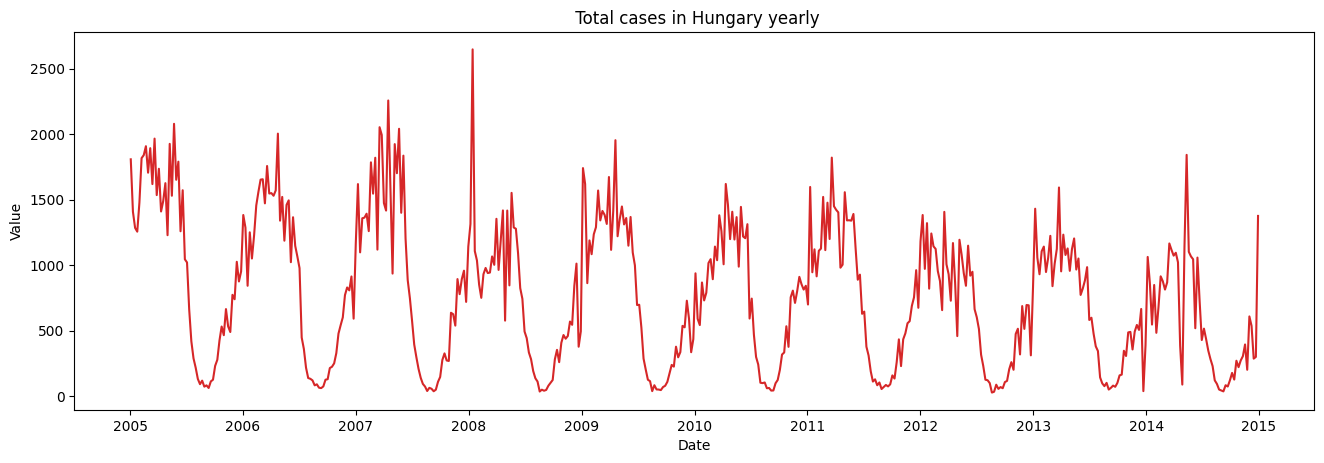

In [ ]:
plot_df(train_df,train_df.Date,train_df.TOTAL,title=" Total cases in Hungary yearly")

In [ ]:
# taking all cities into a list
cities = train_df.columns.to_list()[1:-3]
len(cities)

20

In [ ]:
years

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

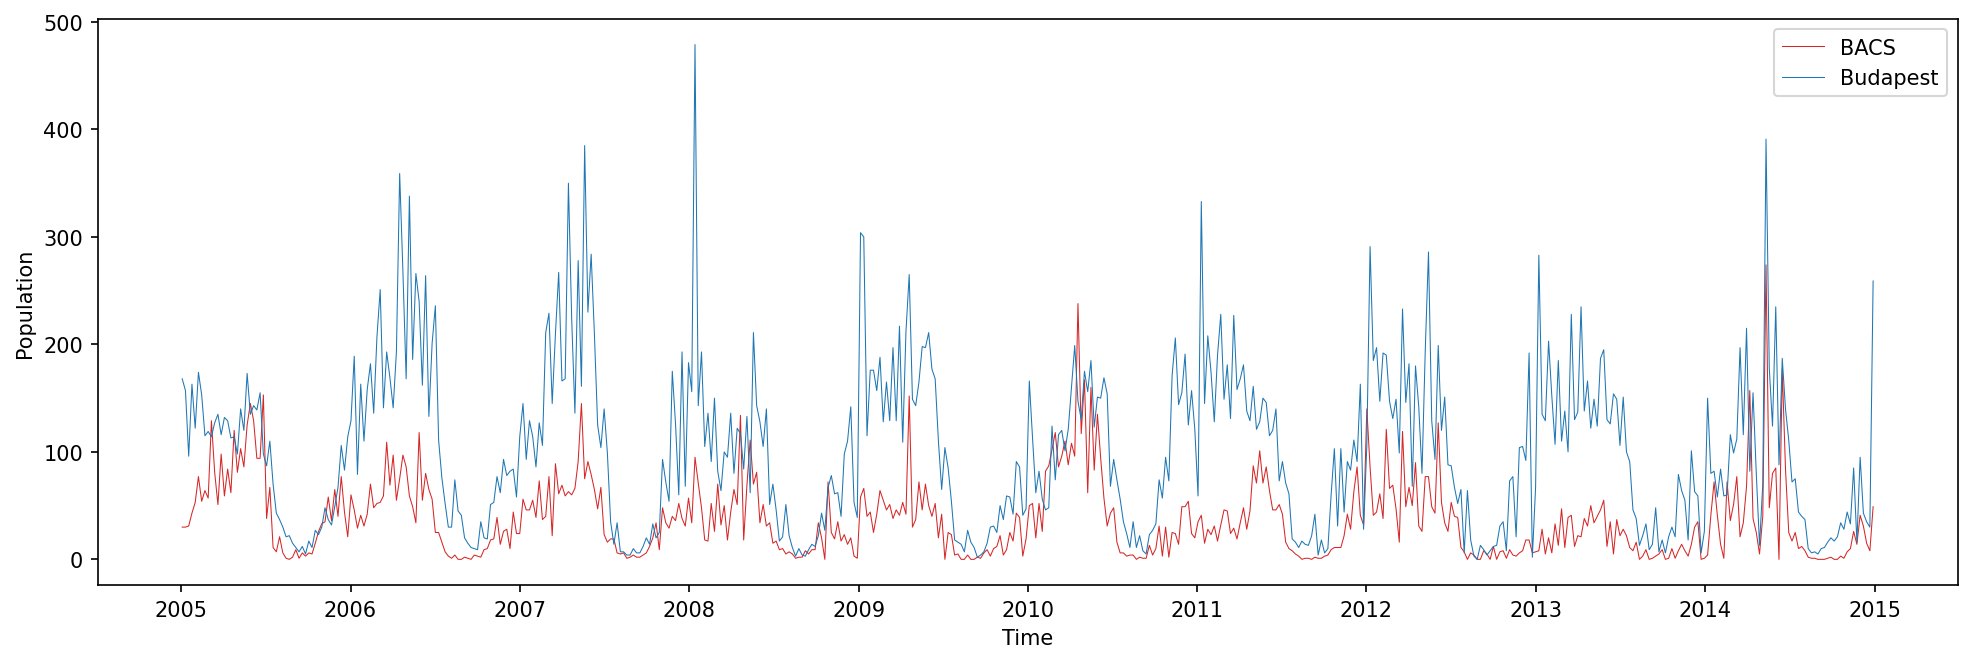

In [ ]:
plt.figure(figsize=(16,5), dpi=150)
plt.plot(train_df.Date, train_df["BACS"], color='tab:red',label = "BACS",linewidth=0.5)
plt.plot(train_df.Date, train_df.BUDAPEST, color='tab:blue',label = "Budapest",linewidth=0.5)
plt.gca().set( xlabel= "Time", ylabel= 'Population')
plt.legend()
plt.show()

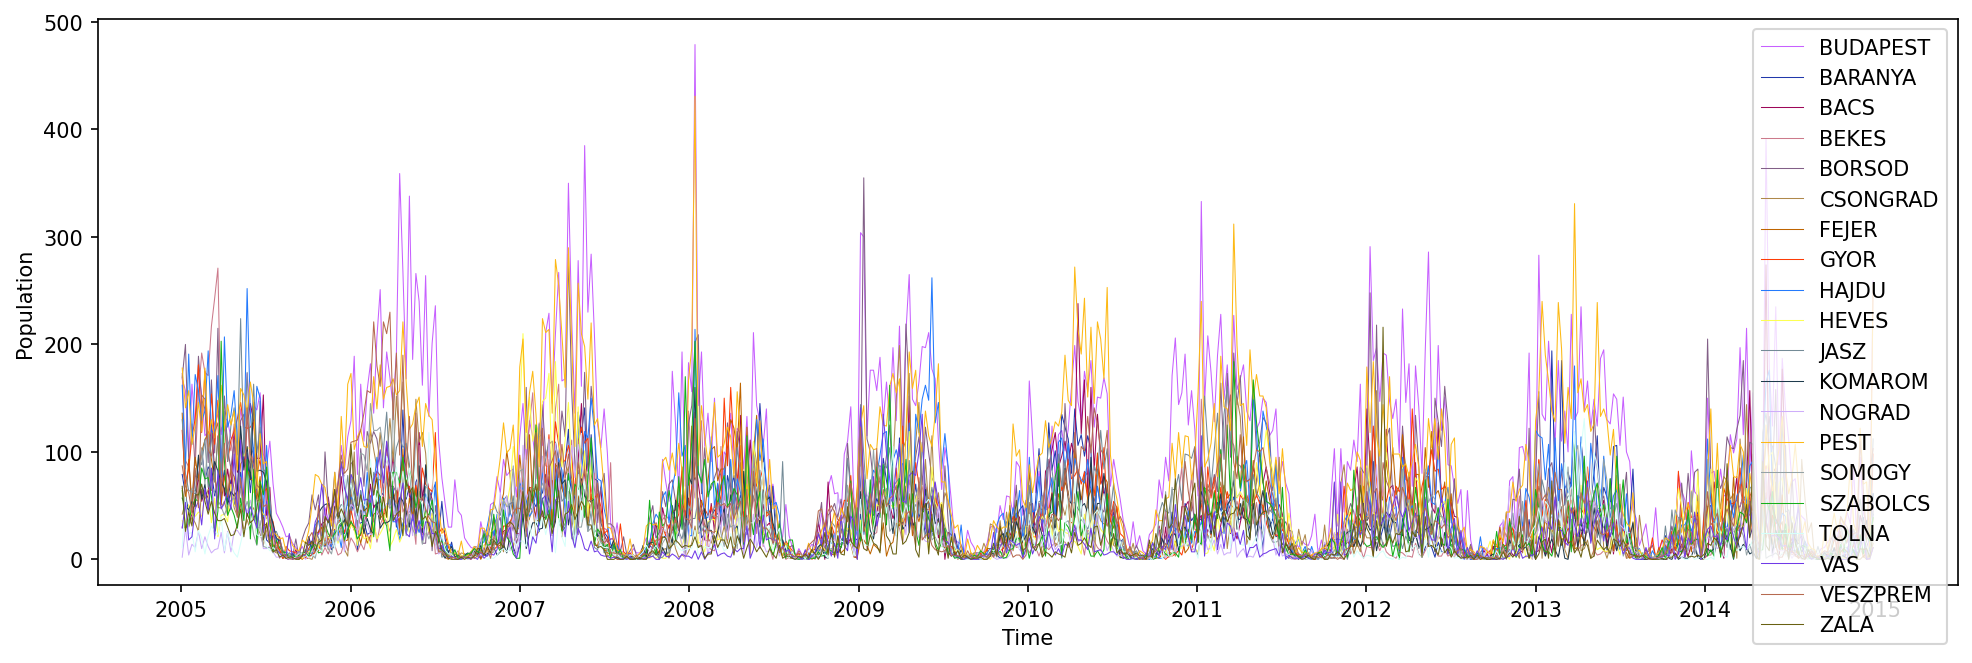

In [ ]:
plt.figure(figsize=(16,5), dpi=150)
i = 1
for c in cities:
  plt.plot(train_df.Date, train_df[c], color=mycolors[i],label = c,linewidth=0.5)
  i = i+1

plt.gca().set( xlabel= "Time", ylabel= 'Population')
plt.legend()
plt.show()


The above graph seems gibberish and no proper information can be extracted from it

In [ ]:
temp_df = train_df
temp_df.drop(['TOTAL','year'],inplace=True,axis=1)

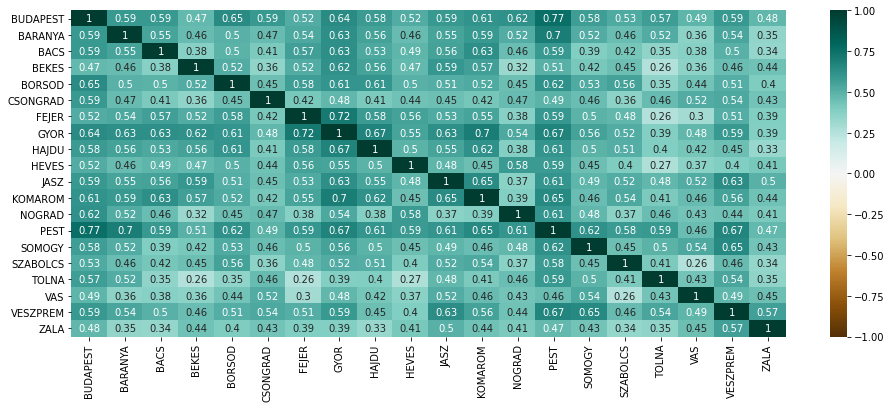

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(temp_df.corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG')
plt.show()

As we see , cases of some states are depended on other states through the heatmap